## Analysis of simulation data

### This notebooks contains scripts:
1. to read and pickle the rheology data, F_rig and z_net
2. load the pickle file
3. make plots using the bidi function

In [1]:
# importing libraries

import os
import matplotlib
import numpy             as     np
import pandas            as     pd
import scipy.optimize    as     opt
import matplotlib.pyplot as     plt
from matplotlib          import font_manager
from   fractions         import Fraction
import pickle
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='mkl')

In [3]:
# script to load data
# read and pickle data if .pkl file doesnt exist

# here we read, concatenate and pickle the simulation data from data_*.dat file, F_rig and z_net

#TopDir      = "/media/rahul/Linux_1TB_HDD/Bidisperse_project/"
TopDir      = "/Users/rahul/Dropbox (City College)/CUNY/Research/Bidisperse Project/"
#TopDir      = "/Volumes/Extreme SSD/high_bidispersity/"

NP          = [1000]

run         = {500:8,1000:4,2000:2,4000:1}

phi         = [0.70,0.71,0.72,0.73,0.74,0.75]

ar          = [1.0, 1.4, 1.8, 2.0, 4.0]

pkl_file    = 'data_files_.pkl'

if os.path.exists(TopDir+pkl_file):
    with open(TopDir+pkl_file, 'rb') as file:
        datasets_dict = pickle.load(file)
        print("\nData loaded from pkl file")

else:
    # files to read
    file_names = ['data_random_seed_params_stress100r_shear.dat','F_rig.txt','Z_Znet.txt']
    sum_variables = ['datasum', 'frigsum', 'znetsum']

    # initializing the dictionary
    datasets=[]                    
    datasets_dict = {key: None for key in datasets}

    for i in range(len(NP)):
        for j in range(len(phi)):
            for k in range(len(ar)):
                dataname=TopDir+'NP_'+str(NP[i])+'/phi_'+"{:.2f}".format(phi[j])+'/ar_'+str(ar[k])+'/Vr_0.5'
                if os.path.exists(dataname):
                    for m, file_name in enumerate(file_names):
                        sum_variables[m]=0
                        for l in range (run[NP[i]]):
                            with open(f'{dataname}/run_{l+1}/{file_name}', 'r') as file:
                                sum_variables[m] += np.loadtxt(file)

                    sum_variables[1]=np.expand_dims(sum_variables[1], axis=1)
                    datafull=np.concatenate(sum_variables,axis=1)
                    datasets_dict['NP_'+str(NP[i])+'_phi_'+"{:.2f}".format(phi[j])+'_ar_'+str(ar[k])]=datafull/run[NP[i]]

    with open(TopDir+pkl_file, 'wb') as file:
        pickle.dump(datasets_dict, file)
    with open(TopDir+pkl_file, 'rb') as file:
        datasets_dict = pickle.load(file)
        print("\nNew data loaded")


Data loaded from pkl file


In [4]:
plt.rcParams.update({
  "figure.max_open_warning": 0,
  "text.usetex": True,
  "figure.autolayout": True,
  "font.family": "STIXGeneral",
  "mathtext.fontset": "stix",
  "font.size":        8,
  "xtick.labelsize":  8,
  "ytick.labelsize":  8,
  "lines.linewidth":  1,
  "lines.markersize": 5
})
plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"

#Function 'bidis' for plotting any parameter from the .dat file, F_rig and Z_net

def bidis(npp,y,x,figsave=False,off=40):
    plt.clf()
    n_rows=len(phi)
    n_cols=len(ar)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,15))
    yvals=[]
    for i, phii in enumerate(phi):
        for j, arj in enumerate(ar):
            filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
            try:
                yvals.append(datasets_dict[filename][off:,x])
            except KeyError:
                fn='NP_1000_phi_0.75_ar_1.4'
                yvals.append(float('nan') for i in datasets_dict[fn][off:,x])
    ylist=[item for sublist in yvals for item in sublist]
    for i, phii in enumerate(phi):
        for j, arj in enumerate(ar):
            filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
            try:
                axs[i, j].plot(datasets_dict[filename][off:,y], datasets_dict[filename][off:,x])
            except KeyError:
                fn='NP_1000_phi_0.75_ar_1.4'
                yv=[float('nan') for i in datasets_dict[fn][off:,x]]
                axs[i, j].plot(datasets_dict[fn][off:,y], yv)     
            axs[i, j].set_ylim(min(ylist), max(ylist)*1.01)
            axs[0, j].set_title(f'ar = {arj}')
        axs[i, 0].set_ylabel(f'phi = {phii}')
    fig.suptitle(f'NP={npp}',fontsize=20)
    plt.subplots_adjust(top=0.942)
    plt.tight_layout()
    plt.show()
    return

#Function 'bidi' for plotting any parameter from the .dat file, F_rig and Z_net

def bidi(npp,y,x,figsave=False,off=40):
    plt.clf()

    FigSize   = (5*4,5*4*3/4)
    cmap = plt.get_cmap('Set1')
    n_rows=len(phi)
    n_cols=len(ar)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=FigSize, sharex=False, sharey=True)
    yvals=[]
    for i, phii in enumerate(phi):
        for j, arj in enumerate(ar):
            filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
            try:
                yvals.append(datasets_dict[filename][off:,x])
            except KeyError:
                fn='NP_1000_phi_0.75_ar_1.4'
                yvals.append(float('nan') for i in datasets_dict[fn][off:,x])
    ylist=[item for sublist in yvals for item in sublist]
    
    for i, phii in enumerate(phi):
        for j, arj in enumerate(ar):
            filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
            try:
                color = cmap(0.0)
                axs[i, j].plot(datasets_dict[filename][off:,y], datasets_dict[filename][off:,x],color='black')
                axs[i, j].grid(which='Both', alpha=0.2)
            except KeyError:
                fn='NP_1000_phi_0.75_ar_1.4'
                yv=[float('nan') for i in datasets_dict[fn][off:,x]]
                axs[i, j].plot(datasets_dict[fn][off:,y], yv, color='black') 
                axs[i, j].grid(which='Both', alpha=0.2)
            axs[i, j].set_ylim(min(ylist), max(ylist)*1.01)
            axs[0, j].set_title(fr'$\mathit{{\delta}} = \mathrm{{{arj}}}$', fontsize=15)
            axs[-1, j].set_xlabel(r'$\mathit{\gamma}$', fontsize=15)
     
        #axs[i, 0].set_ylabel(r'$\mathit{Z}_{\mathit{net}\ \mathit{(mean)}}$', fontsize=15)
        #axs[i, 0].set_ylabel(r'$\mathit{\mu}$', fontsize=15)
        #axs[i, 0].set_ylabel(r'$\mathit{N1}$', fontsize=15)
        #axs[i, 0].set_ylabel(r'$\mathit{N2}$', fontsize=15)
        axs[i, 0].set_ylabel(r'$\mathit{f}_{\mathit{contact}}$', fontsize=15)
        
        ypos = axs[i, 0].get_position().get_points()[0, 1]
        fig.text(1.00, (ypos*1.18)-.03, fr'$\mathit{{\phi}} = {phii:.2f}$', va='center', rotation=90, fontsize=13)
        
    fig.suptitle(f'NP = {npp}',fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(top=0.942)
    plt.show()
    
    if figsave:
        figFormat=".pdf"
        fig.savefig("fcontact_vs_strain_NP_1000"+figFormat, bbox_inches="tight")
    return

### Parameters

| Column 1                              | Column 2                                | Column 3                                | Column 4                                    | Column 5                                  |
|:--------------------------------------|:----------------------------------------|:----------------------------------------|:--------------------------------------------|:------------------------------------------|
| <div style="text-align: left; font-size: 16px;">0. time</div>                               | <div style="text-align: left; font-size: 16px;">7. Viscosity(repulsion)</div>                | <div style="text-align: left; font-size: 16px;">14. max tangential displacement</div>       | <div style="text-align: left; font-size: 16px;">21. max angular velocity</div>              | <div style="text-align: left; font-size: 16px;">28. shear strain</div>                      |
| <div style="text-align: left; font-size: 16px;">1. cumulated shear strain</div>             | <div style="text-align: left; font-size: 16px;">8. particle pressure</div>                   | <div style="text-align: left; font-size: 16px;">15. contact number</div>                    | <div style="text-align: left; font-size: 16px;">22. dt</div>                               | <div style="text-align: left; font-size: 16px;">29. theta shear</div>                       |
| <div style="text-align: left; font-size: 16px;">2. shear rate</div>                         | <div style="text-align: left; font-size: 16px;">9. particle pressure contact</div>           | <div style="text-align: left; font-size: 16px;">16. frictional contact number</div>         | <div style="text-align: left; font-size: 16px;">23. kn</div>                               | <div style="text-align: left; font-size: 16px;">30. Rigid clusters</div>                     |
| <div style="text-align: left; font-size: 16px;">3. viscosity</div>                          | <div style="text-align: left; font-size: 16px;">10. N1 viscosity</div>                       | <div style="text-align: left; font-size: 16px;">17. average sliding friction</div>          | <div style="text-align: left; font-size: 16px;">24. kt</div>                               | <div style="text-align: left; font-size: 16px;">31. mean(Z)</div>                           |
| <div style="text-align: left; font-size: 16px;">4. Viscosity(contact)</div>                  | <div style="text-align: left; font-size: 16px;">11. N2 viscosity</div>                      | <div style="text-align: left; font-size: 16px;">18. number of interactions</div>            | <div style="text-align: left; font-size: 16px;">25. kr</div>                               | <div style="text-align: left; font-size: 16px;">32. std(Z)</div>                            |
| <div style="text-align: left; font-size: 16px;">5. Viscosity(dashpot)</div>                  | <div style="text-align: left; font-size: 16px;">12. energy</div>                            | <div style="text-align: left; font-size: 16px;">19. max velocity</div>                      | <div style="text-align: left; font-size: 16px;">26. shear strain</div>                      | <div style="text-align: left; font-size: 16px;">33. mean(Znet)</div>                        |
| <div style="text-align: left; font-size: 16px;">6. Viscosity(hydro)</div>                    | <div style="text-align: left; font-size: 16px;">13. min gap</div>                           | <div style="text-align: left; font-size: 16px;">20. max velocity</div>                      | <div style="text-align: left; font-size: 16px;">27. shear strain</div>                      | <div style="text-align: left; font-size: 16px;">34. std(Znet)</div>                         |


<Figure size 640x480 with 0 Axes>

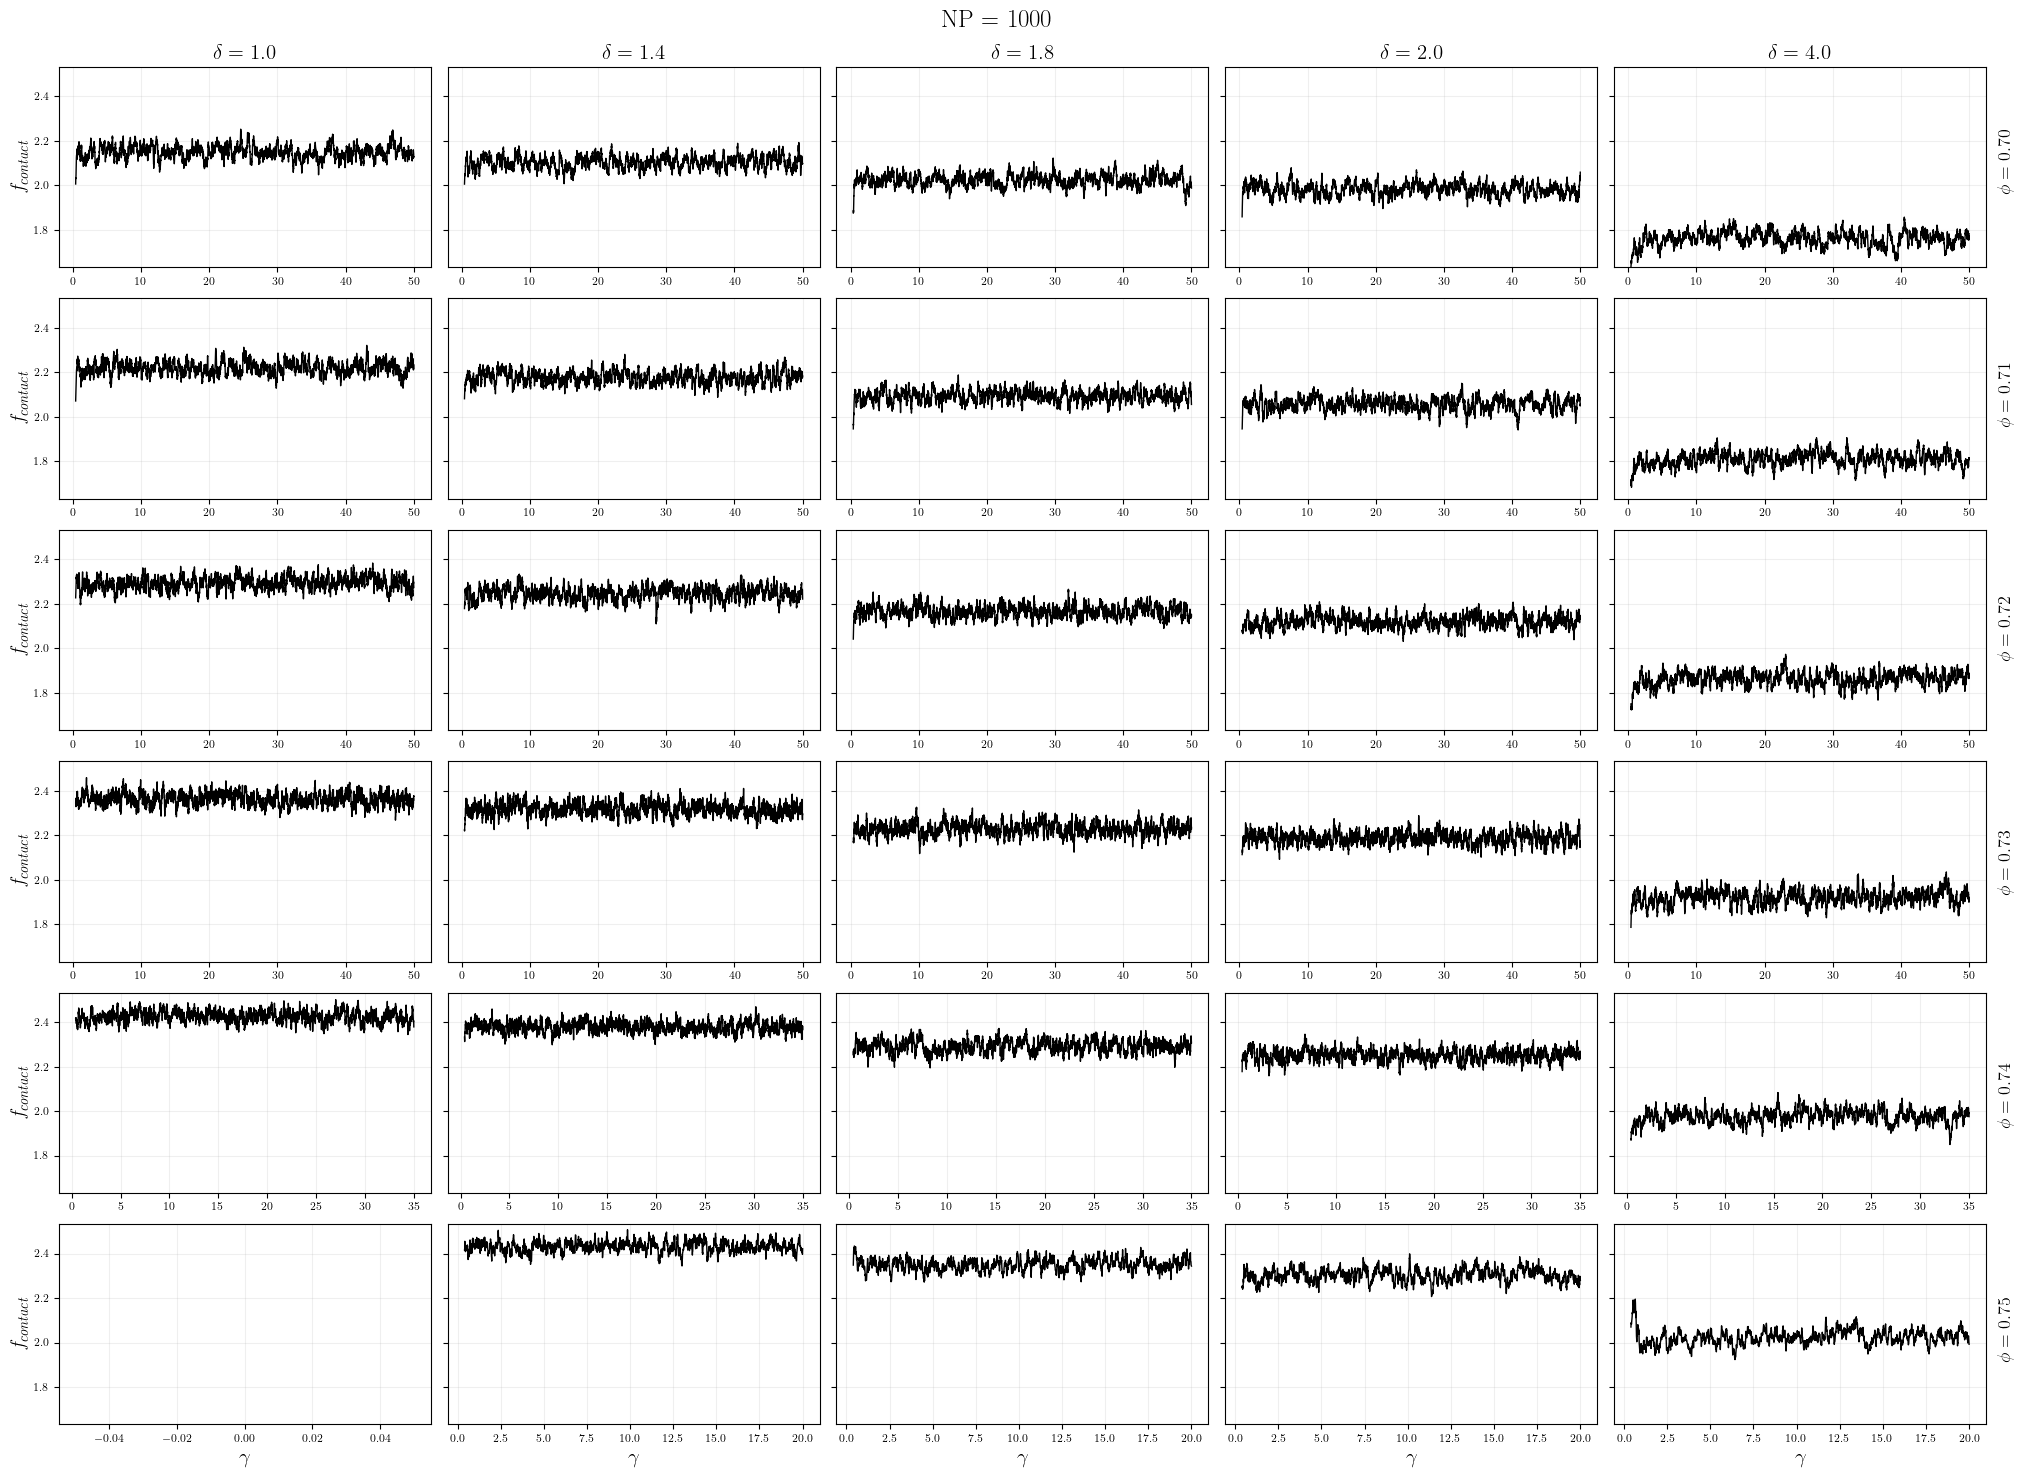

In [44]:
bidi(1000,1,16,True)

In [9]:
labels = [
    { # Title for rheoplots
        30: r'$\mathit{f}_{\mathit{rig}}$ vs $\delta$',
        33: r'$\mathit{Z}_{\mathit{net}}\ \mathit{(mean)}$ vs $\delta$',
        3: r'$\mathit{\eta_{r}}$ vs $\delta$',
        10: r'$\mathit{N_{1}}$ vs $\delta$',
        11: r'$\mathit{N_{1}}$ vs $\delta$',
        16: r'$\mathit{f}_{\mathit{(z \geq 3)}}$ vs $\delta$',
        4: r'$\mathit{\eta_{contact}}$ vs $\delta$',
        5: r'$\mathit{\eta_{dashpot}}$ vs $\delta$',
        6: r'$\mathit{\eta_{hydro}}$ vs $\delta$',
        7: r'$\mathit{\eta_{repulsion}}$ vs $\delta$',
    },
    { # Title for rheoplots_
        30: r'$\mathit{f}_{\mathit{rig}}$ vs $\phi$',
        33: r'$\mathit{Z}_{\mathit{net}}\ \mathit{(mean)}$ vs $\phi$',
        3: r'$\mathit{\eta_{r}}$ vs $\phi$',
        10: r'$\mathit{N_{1}}$ vs $\phi$',
        11: r'$\mathit{N_{2}}$ vs $\phi$',
        16: r'$\mathit{f}_{\mathit{(z \geq 3)}}$ vs $\phi$',
        4: r'$\mathit{\eta_{contact}}$ vs $\phi$',
        5: r'$\mathit{\eta_{dashpot}}$ vs $\phi$',
        6: r'$\mathit{\eta_{hydro}}$ vs $\phi$',
        7: r'$\mathit{\eta_{repulsion}}$ vs $\phi$',
    },
    { # Y label
        30: r'$\mathit{f}_{\mathit{rig}}$',
        33: r'$\mathit{Z}_{\mathit{net}}\ \mathit{(mean)}$',
        3: r'$\mathit{\eta_{r}}$',
        10: r'$\mathit{N_{1}}$',
        11: r'$\mathit{N_{2}}$',
        16: r'$\mathit{f}_{\mathit{(z \geq 3)}}$',
        4: r'$\mathit{\eta_{contact}}$',
        5: r'$\mathit{\eta_{dashpot}}$',
        6: r'$\mathit{\eta_{hydro}}$',
        7: r'$\mathit{\eta_{repulsion}}$',
    },
    { # fig name wrt del (rheoplots)
        30: "frig_vs_del_NP_1000",
        33: "Znet(mean)_vs_del_NP_1000",
        3: "viscosity_vs_del_NP_1000",
        10: "N1_vs_del_NP_1000",
        11: "N2_vs_del_NP_1000",
        16: "f_(z>=3)_vs_del_NP_1000",
        4: "visc(contact)_vs_del_NP_1000",
        5: "visc(dashpot)_vs_del_NP_1000",
        6: "visc(hydro)_vs_del_NP_1000",
        7: "visc(repulsion)_vs_del_NP_1000",
        
    },
    { # fig name wrt phi (rheoplots_)
        30: "frig_vs_phi_NP_1000",
        33: "Znet(mean)_vs_phi_NP_1000",
        3: "viscosity_vs_phi_NP_1000",
        10: "N1_vs_phi_NP_1000",
        11: "N2_vs_phi_NP_1000",
        16: "f_(z>=3)_vs_phi_NP_1000",
        4: "visc(contact)_vs_phi_NP_1000",
        5: "visc(dashpot)_vs_phi_NP_1000",
        6: "visc(hydro)_vs_phi_NP_1000",
        7: "visc(repulsion)_vs_phi_NP_1000",
        
    }
    
]

In [18]:
plt.rcParams.update({
  "figure.max_open_warning": 0,
  "text.usetex": True,
  "figure.autolayout": True,
  "font.family": "STIXGeneral",
  "mathtext.fontset": "stix",
  "font.size":        8,
  "xtick.labelsize":  8,
  "ytick.labelsize":  8,
  "lines.linewidth":  1,
  "lines.markersize": 5
})
plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"

def rheoPlots(npp,x,figsave=False,off=40):
    plt.clf()
    arr       = ar
    cmap      = matplotlib.colormaps['viridis_r']
    
    for i, phii in enumerate(phi):
        dat=[]
        daterr=[]
        for j, arj in enumerate(arr):
            filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
            if filename in datasets_dict:
                dat.append(np.mean(datasets_dict[filename][off:,x]))
                daterr.append(np.std(datasets_dict[filename][off:,x]))
            else:
                arr = arr[1:]
        plt.errorbar(arr, dat, yerr=daterr,fmt='--o',label=r'$\phi$' + f' = {phii:.2f}',color=cmap((i+1)/len(phi)),capsize=2,linewidth=1.2,elinewidth=.5)
        
    plt.grid(which='Both', alpha=0.2)
    
    plt.title(labels[0][x], fontsize=18)
    plt.xlabel(r'$\delta$', fontsize=14,fontstyle='italic')
    plt.ylabel(labels[2][x],fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.legend(loc='upper right', labelspacing=1.5,borderpad=1.2)
    plt.tight_layout()
    if figsave:
        figFormat=".png"
        plt.savefig(labels[3][x]+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()
    
def rheoPlots_(npp,x,figsave=False,off=40):
    plt.clf()
    
    phi_vals       = phi
    arr            = ar
    
    cmap      = matplotlib.colormaps['viridis_r']
    
    for j, arj in enumerate(arr):
        phi_vals       = phi
        dat=[]
        daterr=[]
        for i, phii in enumerate(phi_vals):
            filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
            if filename in datasets_dict:
                dat.append(np.mean(datasets_dict[filename][off:,x]))
                daterr.append(np.std(datasets_dict[filename][off:,x]))
            else:
                phi_vals = phi_vals[:-1]
        plt.errorbar(phi_vals, dat, yerr=daterr, fmt='--o', label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(arr)), capsize=2, linewidth=1.2, elinewidth=0.5)

    plt.grid(which='Both', alpha=0.2)
    
    plt.title(labels[1][x], fontsize=18)
    plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    plt.ylabel(labels[2][x],fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    #plt.legend(loc='upper left', labelspacing=1.2,borderpad=1.0)
    #plt.legend(loc='lower left', labelspacing=1.5,borderpad=1.2)
    plt.tight_layout()
    
    if figsave:
        figFormat=".d"
        plt.savefig(labels[4][x]+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()

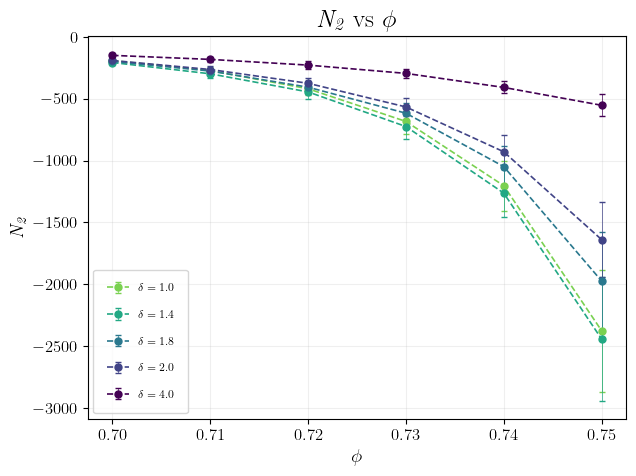

In [17]:
rheoPlots_(1000,11,True)
#plt.legend(loc='lower left', labelspacing=1.5,borderpad=1.2)

In [30]:
fn='NP_1000_phi_0.75_ar_2.0'
np.mean(datasets_dict[fn][40:,16])

2.3030413054564

In [87]:
file_path = '/Volumes/Extreme SSD/high_bidispersity/NP_1000/phi_0.75/ar_1.8/Vr_0.5/run_4/data_random_seed_params_stress100r_shear.dat'
with open(file_path, 'r') as file:
    filex = np.loadtxt(file)
np.mean(filex[40:,3])

773.9446573176949